# Locomotion

In the previos sections we've seen how the `Animal` class can store information about the animal's bodyparts and skeleton and `Trajectory` and `AnchoredTrajectory` can represent geometric entities.

Here we bring this all togheter to represent the animal's locomotion kinematics. This is taken care of by the `Locomotion` class, as shown here.



In [7]:
import sys

sys.path.append("./")

import pandas as pd
import matplotlib.pyplot as plt


from kino.animal import mouse  # pre-defined mouse, same as shown in 01_animal.ipynb
from kino.locomotion import Locomotion


# loaad tracking data
tracking = pd.read_hdf("./example_tracking.h5")
print(tracking)

mouse_id                                                   AAA1110750
name                                         FC_210528_AAA1110750_d19
start_frame                                                     69265
end_frame                                                       69560
duration                                                      4.91667
direction                                                    outbound
color                                                         #F48FB1
complete                                                         true
start_roi                                                           0
end_roi                                                            12
gcoord_delta                                                 0.981919
body_x              [20.636685918545236, 20.706661775064067, 20.75...
left_fl_x           [19.399489849540902, 19.4204830245575, 19.5201...
left_hip_x          [20.056406191046197, 20.272943975837023, 20.74...
left_hl_x           

To create a `Locomotion` object we need a specified `Animal` and the tracking data. The tracking data should be a pandas data series ad it needs to contain, for each bodypart `bp` an object `bp_x` and a `bp_y` with the X and Y tracking coordinates for the body part. The coordinates should be 1 dimensional numpy array with the coordinate value at each frame.

In [9]:
from rich import print

locomotion = Locomotion(mouse, tracking, fps=60)
print(locomotion)

Locomotion(
    animal=Animal(
        'Mouse',
            body parts (8) =[
            BodyPart('left_fl'),
            BodyPart('right_fl'),
            BodyPart('body'),
            BodyPart('right_hl'),
            BodyPart('left_hl'),
            BodyPart('snout'),
            BodyPart('neck'),
            BodyPart('tail_base')
        ],
            bones (7)=[
            Bone('body -> left_fl'),
            Bone('body -> right_fl'),
            Bone('body -> right_hl'),
            Bone('body -> left_hl'),
            Bone('snout -> neck'),
            Bone('neck -> body'),
            Bone('body -> tail_base')
        ]
    ),
    bodyparts 9   ={
        'left_fl': Trajectory: "left_fl",
        'right_fl': Trajectory: "right_fl",
        'body': Trajectory: "body",
        'right_hl': Trajectory: "right_hl",
        'left_hl': Trajectory: "left_hl",
        'snout': Trajectory: "snout",
        'neck': Trajectory: "neck",
        'tail_base': Trajectory: "tail_base",
     

In [24]:
# the locomotion object stores a Trajectory for each bodypart
# for each there's associated kinematics vectors
for bpname, bp in locomotion.bodyparts.items():
    print(bpname, f' max speed: {bp.velocity.magnitude.max():.2f}')


left_fl  max speed: 95.70
right_fl  max speed: 95.57
body  max speed: 87.57
right_hl  max speed: 97.19
left_hl  max speed: 96.35
snout  max speed: 88.90
neck  max speed: 88.22
tail_base  max speed: 89.23
com  max speed: 86.02


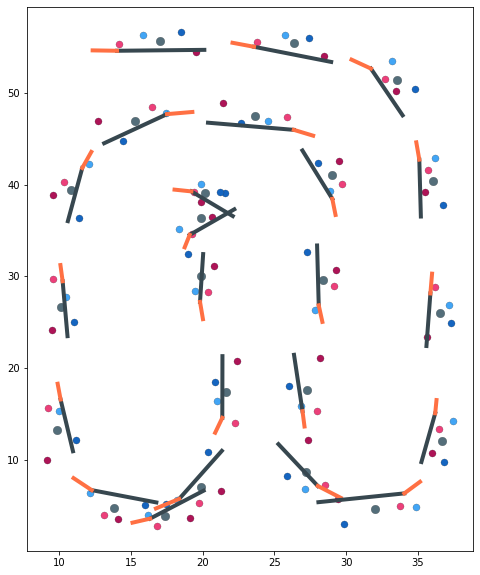

In [16]:
import matplotlib.pyplot as plt
import numpy as np
from kino.draw.animal import DrawAnimal


f, ax = plt.subplots(figsize=(8, 10))

DrawAnimal.at_frame(mouse, locomotion, np.arange(0, 230, 10), ax)

plt.show()

In [ ]:
from kino.draw import DrawAnimal

